# Projekt końcowy PAD - analiza danych danych sklepów Oponeo i Sklep Opon
## Jakub Michalak S20034
### Opis projektu
- Projekt polega na pobraniu danych o oponach z dwóch sklepów internetowych: sklep opon i oponeo
- Opony są pobierane w wielu rozmiarach i sezonie letnim
- Dane pobrane z obu sklepów zostaną zapisane w plikach CSV
- Dane zostały poddane analizie
- Zostały wyciągnięte wnioski
- Zostały przygotowane dwa modele uczenia maszynowego
- Zostały przygotowane dwie aplikacje z zastosowaniem streamlit

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import pickle


from selenium import webdriver
from selenium.webdriver.chrome.service import Service
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline

from scrappers.sklep_opon import scrap_sklep_opon
from scrappers.oponeo import scrap_oponeo
from common.file_utils import load_dataframe_from_csv_files
from IPython.display import display

# 1. Scrapping danych
### 1.1. Konfiguracja drivera do scrapowania danych 
- **Uwaga**: testowane na szerokości okna 1110 pikseli
- Ustawienie szerokości okna na 1100 pikseli pozwala na poprawne działanie skryptów do scrapowania danych ze stron sklep opon i oponeo. Przy wyższej szerokości okna mogą wystąpić problemy z lokalizacją elementów na stronie (np. oceny).

In [4]:
download_service = Service()
driver = webdriver.Chrome(service=download_service)
driver.set_window_size(1100, 800)

### 1.2. Pobieranie danych ze strony sklep opon

In [9]:
scrap_sklep_opon(driver)

Proces scrapowania zakończony.


### 1.3. Pobieranie danych ze strony oponeo

In [5]:
scrap_oponeo(driver)

Rozpoczynam scrapowanie dla rozmiaru: 185/60R16
Okienko prywatności zostało zamknięte.
Brak nowych danych. Koniec paginacji.
Dane zapisano do pliku: data/oponeo/oponeo_185_60_16.csv
Zapisano aktualny rozmiar: 185/60R16
Zapisano ostatni rozmiar: 185/60R16
Rozpoczynam scrapowanie dla rozmiaru: 195/45R16
Okienko prywatności zostało zamknięte.
Brak nowych danych. Koniec paginacji.
Dane zapisano do pliku: data/oponeo/oponeo_195_45_16.csv
Zapisano aktualny rozmiar: 195/45R16
Zapisano ostatni rozmiar: 195/45R16
Rozpoczynam scrapowanie dla rozmiaru: 195/50R16
Okienko prywatności zostało zamknięte.
Brak nowych danych. Koniec paginacji.
Dane zapisano do pliku: data/oponeo/oponeo_195_50_16.csv
Zapisano aktualny rozmiar: 195/50R16
Zapisano ostatni rozmiar: 195/50R16
Rozpoczynam scrapowanie dla rozmiaru: 195/60R16
Okienko prywatności zostało zamknięte.
Brak nowych danych. Koniec paginacji.
Dane zapisano do pliku: data/oponeo/oponeo_195_60_16.csv
Zapisano aktualny rozmiar: 195/60R16
Zapisano ostatni

### 1.4. Zamknięcie drivera po scrapowaniu danych

In [5]:
driver.quit()

### 1.5. Odczyt danych z plików CSV

In [12]:
df_sklep_opon = load_dataframe_from_csv_files("data/sklep_opon")
display(df_sklep_opon)
df_oponeo = load_dataframe_from_csv_files("data/oponeo")
display(df_oponeo)

Ładowanie pliku: data/sklep_opon\sklep_opon_185_50R16.csv
Ładowanie pliku: data/sklep_opon\sklep_opon_185_55R16.csv
Ładowanie pliku: data/sklep_opon\sklep_opon_185_60R16.csv
Ładowanie pliku: data/sklep_opon\sklep_opon_195_45R16.csv
Ładowanie pliku: data/sklep_opon\sklep_opon_195_50R16.csv
Ładowanie pliku: data/sklep_opon\sklep_opon_195_60R16.csv
Ładowanie pliku: data/sklep_opon\sklep_opon_195_65R16.csv
Ładowanie pliku: data/sklep_opon\sklep_opon_205_40R17.csv
Ładowanie pliku: data/sklep_opon\sklep_opon_205_45R16.csv
Ładowanie pliku: data/sklep_opon\sklep_opon_205_45R17.csv
Ładowanie pliku: data/sklep_opon\sklep_opon_205_50R16.csv
Ładowanie pliku: data/sklep_opon\sklep_opon_205_50R17.csv
Ładowanie pliku: data/sklep_opon\sklep_opon_205_55R16.csv
Ładowanie pliku: data/sklep_opon\sklep_opon_205_55R17.csv
Ładowanie pliku: data/sklep_opon\sklep_opon_205_60R16.csv
Ładowanie pliku: data/sklep_opon\sklep_opon_205_65R16.csv
Ładowanie pliku: data/sklep_opon\sklep_opon_215_35R18.csv
Ładowanie plik

,name,brand,model,size,load_index,speed_index,fuel_index,wet_grip_index,noise_index,noise_level,class,user_rating,price,availability
0,BluEarth-A AE-50 185/50 R16 81 H,Yokohama,BluEarth-A AE-50,185/50 R16,81.0,H,D,C,B,68.0,Premium,5.8,460.01,full
1,Nfera Primus 185/50 R16 81 V,Nexen,Nfera Primus,185/50 R16,81.0,V,C,A,B,70.0,Średnia,5.4,384.24,full
2,RPX800 185/50 R16 85 V,Radar,RPX800,185/50 R16,85.0,V,C,B,B,70.0,Ekonomiczna,5.2,270.59,full
3,Ziex ZE310 Ecorun 185/50 R16 81 V,Falken,Ziex ZE310 Ecorun,185/50 R16,81.0,V,D,A,B,70.0,Średnia,5.5,398.48,full
4,AdvanteX TC101 185/50 R16 81 V,Triangle,AdvanteX TC101,185/50 R16,81.0,V,D,C,B,70.0,NaN,4.2,239.47,full
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21094,Scorpion Verde All Season 295/45 R19 113 W,Pirelli,Scorpion Verde All Season,295/45 R19,113.0,W,B,B,A,70.0,Premium,5.1,1132.08,medium
21095,Pilot Sport 4 SUV 295/45 R19 113 Y,Michelin,Pilot Sport 4 SUV,295/45 R19,113.0,Y,C,A,B,74.0,Premium,5.7,1070.29,medium
21096,Ventus S1 evo3 K127 295/45 R19 113 Y,Hankook,Ventus S1 evo3 K127,295/45 R19,113.0,Y,C,A,B,75.0,Premium,5.3,540.00,last
21097,Scorpion Verde All Season 295/45 R19 113 W,Pirelli,Scorpion Verde All Season,295/45 R19,113.0,W,B,B,A,70.0,Premium,5.1,1124.21,last


Ładowanie pliku: data/oponeo\oponeo_185_50_16.csv
Ładowanie pliku: data/oponeo\oponeo_185_55_16.csv
Ładowanie pliku: data/oponeo\oponeo_185_60_16.csv
Ładowanie pliku: data/oponeo\oponeo_195_45_16.csv
Ładowanie pliku: data/oponeo\oponeo_195_50_16.csv
Ładowanie pliku: data/oponeo\oponeo_195_60_16.csv
Ładowanie pliku: data/oponeo\oponeo_195_65_16.csv
Ładowanie pliku: data/oponeo\oponeo_205_40_17.csv
Ładowanie pliku: data/oponeo\oponeo_205_45_16.csv
Ładowanie pliku: data/oponeo\oponeo_205_45_17.csv
Ładowanie pliku: data/oponeo\oponeo_205_50_16.csv
Ładowanie pliku: data/oponeo\oponeo_205_50_17.csv
Ładowanie pliku: data/oponeo\oponeo_205_55_16.csv
Ładowanie pliku: data/oponeo\oponeo_205_55_17.csv
Ładowanie pliku: data/oponeo\oponeo_205_60_16.csv
Ładowanie pliku: data/oponeo\oponeo_205_65_16.csv
Ładowanie pliku: data/oponeo\oponeo_215_35_18.csv
Ładowanie pliku: data/oponeo\oponeo_215_40_17.csv
Ładowanie pliku: data/oponeo\oponeo_215_40_18.csv
Ładowanie pliku: data/oponeo\oponeo_215_45_16.csv


,name,brand,model,size,load_index,speed_index,fuel_index,wet_grip_index,noise_index,noise_level,class,user_rating,price,availability
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,unknown
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,unknown
2,Continental UltraContact 185/50 R16 81 H FR,Continental,UltraContact,185/50 R16,81.0,H,C,A,B,70.0,Premium,4.7,539.0,medium
3,Firemax FM601 185/50 R16 81 V,Firemax,FM601,185/50 R16,81.0,V,D,B,B,69.0,Ekonomiczna,4.3,164.0,full
4,Barum Bravuris 5HM 185/50 R16 81 V,Barum,Bravuris 5HM,185/50 R16,81.0,V,D,B,B,70.0,Ekonomiczna,4.4,269.0,low
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14341,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,unknown
14342,Hankook Ventus S1 Evo3 SUV K127A 295/45 R19 11...,Hankook,Ventus S1 Evo3 SUV K127A,295/45 R19,113.0,Y,C,A,B,75.0,Średnia,4.6,616.0,full
14343,Michelin Pilot Sport 4 SUV 295/45 R19 113 Y XL,Michelin,Pilot Sport 4 SUV,295/45 R19,113.0,Y,C,A,B,74.0,Premium,4.8,976.0,medium
14344,Pirelli Scorpion Verde All Season 295/45 R19 1...,Pirelli,Scorpion Verde All Season,295/45 R19,113.0,W,B,B,A,70.0,Premium,4.4,1109.0,medium


### 1.6. Weryfikacja poprawnych wartości w każdej kolumnie

In [13]:
print("sklep opon")
print("typy danych w kolumnach")
print(df_sklep_opon.dtypes)
print("unikalne wartości w kolumnach")
for column in df_sklep_opon.columns:
    if column not in ["name", "brand", "model"]:
        print(column, df_sklep_opon[column].unique())
print("oponeo")
print("typy danych w kolumnach")
print(df_oponeo.dtypes)
print("unikalne wartości w kolumnach")
for column in df_oponeo.columns:
    if column not in ["name", "brand", "model"]:
        print(column, df_oponeo[column].unique())

sklep opon
typy danych w kolumnach
name               object
brand              object
model              object
size               object
load_index        float64
speed_index        object
fuel_index         object
wet_grip_index     object
noise_index        object
noise_level       float64
class              object
user_rating       float64
price             float64
availability       object
dtype: object
unikalne wartości w kolumnach
size ['185/50 R16' '185/55 R16' '185/60 R16' '195/45 R16' '195/50 R16'
 '195/60 R16' '195/65 R16' '205/40 R17' '205/45 R16' '205/45 R17'
 '205/50 R16' '205/50 R17' '205/55 R16' '205/55 R17' '205/60 R16'
 '205/65 R16' '215/35 R18' '215/40 R17' '215/40 R18' '215/45 R16'
 '215/45 R17' '215/45 R18' '215/50 R17' '215/50 R18' '215/55 R16'
 '215/55 R17' '215/55 R18' '215/60 R16' '215/60 R17' '215/65 R16'
 '215/65 R17' '225/35 R18' '225/35 R19' '225/40 R18' '225/40 R19'
 '225/45 R17' '225/45 R18' '225/45 R19' '225/50 R16' '225/50 R17'
 '225/50 R18' '225/50 R1

# 2. Czyszczenie i przygotowanie danych

### 2.1. konwersja kolumn do typów numerycznych i typu category

In [3]:
def update_column_types(param_df):
    param_df['noise_level'] = pd.to_numeric(param_df['noise_level'], errors='coerce').astype('Int64')
    param_df['user_rating'] = pd.to_numeric(param_df['user_rating'], errors='coerce').astype(float)
    param_df['price'] = param_df['price'].replace({' ': ''}, regex=True)
    param_df['price'] = pd.to_numeric(param_df['price'], errors='coerce').astype(float)
    param_df['size'] = param_df['size'].astype('category')
    param_df['load_index'] = param_df['load_index'].astype('category')
    param_df['speed_index'] = param_df['speed_index'].astype('category')
    param_df['fuel_index'] = param_df['fuel_index'].astype('category')
    param_df['wet_grip_index'] = param_df['wet_grip_index'].astype('category')
    param_df['noise_index'] = param_df['noise_index'].astype('category')
    param_df['class'] = param_df['class'].astype('category')
    param_df['availability'] = param_df['availability'].astype('category')
    param_df['user_rating'] = param_df['user_rating'].astype('float32')
    

def drop_invalid_sklep_opon_data(param_df):
    param_df = param_df.dropna(subset=['load_index'])
    param_df = param_df.dropna(subset=['fuel_index'])
    param_df = param_df.dropna(subset=['wet_grip_index'])
    param_df = param_df.dropna(subset=['noise_index'])
    param_df = param_df.dropna(subset=['noise_level'])
    param_df['user_rating'] = param_df['user_rating'].fillna(0)
    return param_df

def drop_invalid_oponeo_data(param_df):
    param_df = param_df.dropna(subset=['load_index'])
    param_df = param_df.dropna(subset=['speed_index'])
    param_df = param_df.dropna(subset=['fuel_index'])
    param_df = param_df.dropna(subset=['wet_grip_index'])
    param_df = param_df.dropna(subset=['noise_index'])
    param_df = param_df.dropna(subset=['noise_level'])
    param_df['load_index'] = param_df['load_index'].cat.rename_categories({'108/106': '106'})
    param_df['user_rating'] = param_df['user_rating'].fillna(0)
    return param_df

In [14]:
df_sklep_opon['speed_index'] = df_sklep_opon['speed_index'].replace({'(Y)': 'Y'})
update_column_types(df_oponeo)
update_column_types(df_sklep_opon)

### 2.2. Funkcje pomocnicze

In [5]:
def find_closest_key(value, param_map):
        closest_key = min(param_map, key=lambda k: abs(param_map[k] - value))
        return closest_key

def find_closest_value(value, param_map):
        closest_key = min(param_map, key=lambda k: abs(param_map[k] - value))
        return param_map[closest_key]

### 2.3. Uzupełnianie noise_index na podstawie noise_level

In [15]:
def update_noise_index_column(df):
    grouped_noise_index = df.groupby('noise_index', observed=False)['noise_level'].mean().round().astype(int)
    
    if 'C' not in grouped_noise_index:
        if 'B' in grouped_noise_index and 'A' in grouped_noise_index:
            grouped_noise_index['C'] = grouped_noise_index['B'] + (grouped_noise_index['B'] - grouped_noise_index['A'])
    
    noise_map = grouped_noise_index.to_dict()
    
    def apply_update_noise_index(row):
        if pd.notna(row['noise_level']) and pd.isna(row['noise_index']):
            return find_closest_key(row['noise_level'], noise_map)
        return row['noise_index']
    
    df['noise_index'] = df.apply(apply_update_noise_index, axis=1)
    
    return df

df_oponeo = update_noise_index_column(df_oponeo)
df_sklep_opon = update_noise_index_column(df_sklep_opon)

print("Zaktualizowano noise_index")
print(df_oponeo['noise_index'].unique())
print(df_sklep_opon['noise_index'].unique())

Zaktualizowano noise_index
[nan 'B' 'A' 'C']
['B' nan 'A' 'C']


### 2.4. Uzupełnianie ceny na podstawie średniej ceny i klasy na podstawie ceny

In [16]:
def update_price_column(param_df):
    class_price_map = param_df.groupby('class', observed=False)['price'].mean().to_dict()
    
    def apply_update_price(row):
        if pd.isna(row['price']):
            return find_closest_value(row['price'], class_price_map)
        return row['price']
    
    def apply_update_class(row):
        if pd.isna(row['class']):
            return find_closest_key(row['price'], class_price_map)
        return row['class']
    
    param_df['price'] = param_df.apply(apply_update_price, axis=1)
    param_df['class'] = param_df.apply(apply_update_class, axis=1)
    
    return param_df

df_oponeo = update_price_column(df_oponeo)
df_sklep_opon = update_price_column(df_sklep_opon)

print("Zaktualizowano cenę i klasę")
print("oponeo")
print(df_oponeo['price'].unique())
print(df_oponeo['class'].unique())
print("sklep opon")
print(df_sklep_opon['price'].unique())
print(df_sklep_opon['class'].unique())

Zaktualizowano cenę i klasę
oponeo
[ 416.05413422  539.          164.         ... 1753.         1837.
 1109.        ]
['Ekonomiczna' 'Premium' 'Średnia']
sklep opon
[ 460.01  384.24  270.59 ... 1070.29 1124.21  640.3 ]
['Premium' 'Średnia' 'Ekonomiczna']


### 2.5. Usunięcie brakujących wartości i ponowna weryfikacja wartości w kolumnach

In [17]:
drop_invalid_sklep_opon_data(df_sklep_opon)
drop_invalid_oponeo_data(df_oponeo)

print("sklep opon")
print("typy danych w kolumnach")
print(df_sklep_opon.dtypes)
print("unikalne wartości w kolumnach")
for column in df_sklep_opon.columns:
    if column not in ["name", "brand", "model", "price", "size"]:
        print(column, df_sklep_opon[column].unique().tolist())
print("oponeo")
print("typy danych w kolumnach")
print(df_oponeo.dtypes)
print("unikalne wartości w kolumnach")
for column in df_oponeo.columns:
    if column not in ["name", "brand", "model", "price", "size"]:
        print(column, df_oponeo[column].unique().tolist())

sklep opon
typy danych w kolumnach
name                object
brand               object
model               object
size              category
load_index        category
speed_index       category
fuel_index        category
wet_grip_index    category
noise_index         object
noise_level          Int64
class               object
user_rating        float32
price              float64
availability      category
dtype: object
unikalne wartości w kolumnach
load_index [81.0, 85.0, 83.0, 87.0, 86.0, 84.0, 80.0, 88.0, 89.0, 99.0, 93.0, 104.0, 100.0, 92.0, 91.0, 94.0, 95.0, 96.0, 107.0, 103.0, 90.0, 97.0, 98.0, 109.0, 108.0, 102.0, 106.0, 101.0, 105.0, 111.0, 112.0, 121.0, 118.0, 116.0, 115.0, 117.0, 110.0, 114.0, 113.0]
speed_index ['H', 'V', 'T', 'W', 'R', 'Y', 'N', 'S', 'Q']
fuel_index ['D', 'C', 'B', 'A', 'E']
wet_grip_index ['C', 'A', 'B', 'D', 'E']
noise_index ['B', 'A', 'C']
noise_level [68, 70, 71, 69, 67, 66, 72, 73, 65, 74, 75]
class ['Premium', 'Średnia', 'Ekonomiczna']
user_rating 

### 2.6. Znalezienie, uzupełnienie i usunięcie duplikatów
- Funkcja do identyfikacji duplikatów na podstawie 'name', 'brand', 'model' i wypełniania brakujących danych
- Usuwa duplikaty na podstawie ilości uzupełnionych kolumn - zostawia wiersz z największą ilością uzupełnionych kolumn

In [18]:
def fill_missing_with_duplicates(df_param):
    columns_subset = ['name', 'brand', 'model', 'size']
    duplicates = df_param[df_param.duplicated(subset=columns_subset, keep=False)]
    
    for idx, group in duplicates.groupby(columns_subset, observed=True):  # Dodano observed=True
        for col in df_param.columns:
            if group[col].isna().any():
                # Jeśli mamy wartości do wypełnienia, to szukamy pierwszej dostępnej wartości
                fill_value = group[col].dropna().iloc[0] if not group[col].dropna().empty else None
                if fill_value is not None:  # Tylko wypełniaj, jeśli fill_value nie jest None
                    df_param.loc[group.index, col] = df_param.loc[group.index, col].fillna(fill_value)

    df_param['non_nan_count'] = df_param.notna().sum(axis=1)
    
    # Sprawdzenie, czy grupa nie jest pusta przed idxmax()
    group_max_idx = df_param.groupby(columns_subset, observed=True)['non_nan_count'].apply(
        lambda x: x.idxmax() if not x.empty else None
    ).dropna()
    
    df_param = df_param.loc[group_max_idx]
    df_param.drop(columns=['non_nan_count'], inplace=True)
    
    return df_param

print("Przed usunięciem duplikatów")
print("sklep opon: ", df_sklep_opon.shape)
print("oponeo: ", df_oponeo.shape)

df_sklep_opon = fill_missing_with_duplicates(df_sklep_opon)
df_oponeo = fill_missing_with_duplicates(df_oponeo)

print("Po usunięciu duplikatów")
print("sklep opon: ", df_sklep_opon.shape)
print("oponeo: ", df_oponeo.shape)

Przed usunięciem duplikatów
sklep opon:  (16395, 14)
oponeo:  (12205, 14)
Po usunięciu duplikatów
sklep opon:  (11164, 14)
oponeo:  (11133, 14)


### 2.7. Wyświetlenie danych po czyszczeniu i zapisanie do plików CSV

In [21]:
print("sklep opon")
print("typy danych w kolumnach")
print(df_sklep_opon.dtypes)
print("unikalne wartości w kolumnach")
for column in df_sklep_opon.columns:
    if column not in ["name", "brand", "model"]:
        print(column, df_sklep_opon[column].unique())
display(df_sklep_opon)

print("oponeo")
print("typy danych w kolumnach")
print(df_oponeo.dtypes)
print("unikalne wartości w kolumnach")
for column in df_oponeo.columns:
    if column not in ["name", "brand", "model"]:
        print(column, df_oponeo[column].unique())
display(df_oponeo)

df_oponeo.to_csv("data/cleaned/oponeo.csv", index=False)
df_sklep_opon.to_csv("data/cleaned/sklep_opon.csv", index=False)

sklep opon
typy danych w kolumnach
name                object
brand               object
model               object
size              category
load_index        category
speed_index       category
fuel_index        category
wet_grip_index    category
noise_index       category
noise_level          Int64
class             category
user_rating        float32
price              float64
availability      category
retailer            object
dtype: object
unikalne wartości w kolumnach
size ['195/65 R16', '225/65 R16', '225/75 R16', '255/55 R18', '215/55 R18', ..., '245/55 R18', '265/45 R19', '295/40 R19', '225/50 R19', '295/45 R19']
Length: 129
Categories (129, object): ['185/50 R16', '185/55 R16', '185/60 R16', '195/45 R16', ..., '295/30 R19', '295/35 R19', '295/40 R19', '295/45 R19']
load_index [104.0, 112.0, 118.0, 109.0, 99.0, ..., 115.0, 80.0, 113.0, 114.0, 85.0]
Length: 39
Categories (39, float64): [80.0, 81.0, 83.0, 84.0, ..., 116.0, 117.0, 118.0, 121.0]
speed_index ['R', 'V', 'H', 'W

,name,brand,model,size,load_index,speed_index,fuel_index,wet_grip_index,noise_index,noise_level,class,user_rating,price,availability,retailer
0,101 195/65 R16 104/102 R,Orium,101,195/65 R16,104.0,R,D,C,B,72,Średnia,0.0,611.62,medium,Sklep opon
1,101 225/65 R16 112/110 R,Orium,101,225/65 R16,112.0,R,D,C,B,72,Premium,0.0,672.80,medium,Sklep opon
2,101 225/75 R16 118/116 R,Orium,101,225/75 R16,118.0,R,D,C,B,72,Średnia,0.0,648.08,medium,Sklep opon
3,4x4 Road 255/55 R18 109 V,Fulda,4x4 Road,255/55 R18,109.0,V,C,C,B,73,Średnia,4.7,567.21,full,Sklep opon
4,701 215/55 R18 99 V,Orium,701,215/55 R18,99.0,V,D,C,B,71,Premium,0.0,669.68,medium,Sklep opon
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11159,iON ST AS IH61A 215/60 R17 96 V,Hankook,iON ST AS IH61A,215/60 R17,96.0,V,B,D,B,70,Premium,0.0,523.25,full,Sklep opon
11160,iON ST AS IH61A 225/55 R18 102 V,Hankook,iON ST AS IH61A,225/55 R18,102.0,V,B,D,B,70,Premium,0.0,634.24,full,Sklep opon
11161,iON ST AS IH61A 225/60 R18 104 W,Hankook,iON ST AS IH61A,225/60 R18,104.0,W,B,D,B,69,Premium,0.0,743.14,full,Sklep opon
11162,iON ST AS IH61A 235/55 R18 100 V,Hankook,iON ST AS IH61A,235/55 R18,100.0,V,B,D,B,70,Premium,0.0,591.50,full,Sklep opon


oponeo
typy danych w kolumnach
name                object
brand               object
model               object
size              category
load_index        category
speed_index       category
fuel_index        category
wet_grip_index    category
noise_index       category
noise_level          Int64
class             category
user_rating        float32
price              float64
availability      category
retailer            object
dtype: object
unikalne wartości w kolumnach
size ['245/35 R19', '245/45 R19', '255/35 R18', '255/40 R17', '205/50 R17', ..., '195/65 R16', '225/75 R16', '225/65 R16', '295/45 R19', '245/55 R18']
Length: 129
Categories (129, object): ['185/50 R16', '185/55 R16', '185/60 R16', '195/45 R16', ..., '295/30 R19', '295/35 R19', '295/40 R19', '295/45 R19']
load_index [NaN, 103.0, 95.0, 96.0, 83.0, ..., 118.0, 80.0, 115.0, 111.0, 117.0]
Length: 37
Categories (36, float64): [80.0, 81.0, 83.0, 84.0, ..., 116.0, 117.0, 118.0, 121.0]
speed_index ['Y', 'W', 'H', 'V', 'T',

,name,brand,model,size,load_index,speed_index,fuel_index,wet_grip_index,noise_index,noise_level,class,user_rating,price,availability,retailer
0,"Accelera PHI 245/35 R19 93 Y XL, ZR",Accelera,PHI,245/35 R19,NaN,Y,C,C,B,70,Ekonomiczna,NaN,564.0,medium,Oponeo
1,"Accelera PHI 245/45 R19 102 Y XL, ZR",Accelera,PHI,245/45 R19,103.0,Y,C,C,B,70,Ekonomiczna,5.1,629.0,medium,Oponeo
2,"Accelera PHI 255/35 R18 94 Y XL, ZR",Accelera,PHI,255/35 R18,95.0,Y,C,C,A,70,Ekonomiczna,5.1,502.0,medium,Oponeo
3,"Accelera PHI 255/40 R17 98 W XL, ZR",Accelera,PHI,255/40 R17,96.0,W,C,C,A,70,Ekonomiczna,5.1,473.0,medium,Oponeo
4,"Alliance 030EX 205/50 R17 93 W XL, RPB",Alliance,030EX,205/50 R17,83.0,W,C,C,B,71,Ekonomiczna,5.6,385.0,full,Oponeo
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11128,Zeetex ZT1000 205/65 R16 95 V,Zeetex,ZT1000,205/65 R16,NaN,V,D,C,B,71,Średnia,NaN,371.0,full,Oponeo
11129,Zeetex ZT6000 eco 205/55 R16 91 V,Zeetex,ZT6000 eco,205/55 R16,84.0,V,D,C,B,71,Średnia,5.0,189.0,full,Oponeo
11130,Zeetex ZT6000 eco 205/60 R16 92 V,Zeetex,ZT6000 eco,205/60 R16,93.0,V,D,C,B,71,Średnia,4.8,204.0,full,Oponeo
11131,Zeetex ZT6000 eco 215/60 R16 95 V,Zeetex,ZT6000 eco,215/60 R16,NaN,V,D,C,B,71,Średnia,NaN,217.0,full,Oponeo


# 3. Eksploracyjna Analiza danych

- Opcjonalne ładowanie oczyszczonych danych z plików CSV jeżeli nie chcemy ponownie scrapować danych

In [4]:
df_oponeo = pd.read_csv("data/cleaned/oponeo.csv", delimiter=",")
df_sklep_opon = pd.read_csv("data/cleaned/sklep_opon.csv", delimiter=",")
update_column_types(df_oponeo)
update_column_types(df_sklep_opon)
drop_invalid_sklep_opon_data(df_sklep_opon)
drop_invalid_oponeo_data(df_oponeo)

df_oponeo['retailer'] = 'Oponeo'
df_sklep_opon['retailer'] = 'Sklep opon'
df = pd.concat([df_oponeo, df_sklep_opon], ignore_index=True)


### 3.1. Średnia, mediana, min i max cen opon w każdym sklepie

In [15]:
price_stats = df.groupby('retailer')['price'].agg(['mean', 'median', 'min', 'max'])
price_stats

,mean,median,min,max
retailer,,,,
Oponeo,549.879098,514.00,147.00,2870.00
Sklep opon,620.162906,524.99,156.77,7978.59


### 3.2. Średnia cena opon w zależności od klasy i sklepu

In [16]:
class_price_stats = df.groupby(['retailer', 'class'], observed=False)['price'].mean().unstack()
class_price_stats

class,Ekonomiczna,Premium,Średnia
retailer,,,
Oponeo,410.230786,709.482186,534.727127
Sklep opon,386.314343,814.549719,554.590718


### 3.3. Liczba opon w każdej klasie efektywności w obu sklepach

In [17]:
class_distribution = df.groupby(['retailer', 'class'], observed=False).size().unstack()
class_distribution

class,Ekonomiczna,Premium,Średnia
retailer,,,
Oponeo,4476,4154,2503
Sklep opon,3343,4980,2841


### 3.4. Średnia ceny opon w zależności od:
 - sklepu oraz indeksów: paliwowego, przyczepności i hałasu
 - sklepu oraz nośności
 - sklepu oraz indeksu prędkości

In [18]:
# Grupowanie danych według rozmiaru i liczenie wystąpień
size_counts = df['size'].value_counts()

# Losowy liczny rozmiar opony
common_size = size_counts.index[2]

filtered_df = df[df['size'] == common_size]


pivot_price_indices = filtered_df.pivot_table(
    values='price',
    index='retailer',
    columns=['fuel_index', 'wet_grip_index', 'noise_index'],
    aggfunc='mean',
    observed=False
)
display(pivot_price_indices)

pivot_price_speed_load = filtered_df.pivot_table(
    values='price',
    index='retailer',
    columns='speed_index',
    aggfunc='mean',
    observed=False
)
display(pivot_price_speed_load)

fuel_index           A                                             B  \
wet_grip_index       A                     B                       A   
noise_index          A           B         A           B           A   
retailer                                                               
Oponeo          461.00  557.615385  625.8000  521.777778  550.666667   
Sklep opon      404.59  521.341000  560.9475  550.701000  670.112500   

fuel_index                                                         ...  \
wet_grip_index                       B              C              ...   
noise_index              B           B       C      A           B  ...   
retailer                                                           ...   
Oponeo          526.800000  465.200000     NaN  369.0  384.000000  ...   
Sklep opon      576.276154  451.630625  370.71    NaN  411.166667  ...   

fuel_index               C                                          D          \
wet_grip_index           A         B                       C        A           
noise_index              B         A           B           B        A       B   
retailer                                                                        
Oponeo          493.357143  397.0000  394.305556  413.107143      NaN  518.50   
Sklep opon      466.148214  346.0175  418.447258  440.808125  338.335  475.86   

fuel_index                                          E  
wet_grip_index           B           C      D       C  
noise_index              B           B      B       B  
retailer                                               
Oponeo          455.375000  362.400000  297.5  322.60  
Sklep opon      465.588333  362.744545  411.3  316.58  

[2 rows x 22 columns]

speed_index,H,V,W,Y
retailer,,,,
Oponeo,436.484536,429.039683,557.500000,667.0
Sklep opon,434.824787,453.312523,572.302632,566.9


### 3.5. Porównanie:
 - cen opon w obu sklepach dla tych samych modeli
  - dostępności opon w obu sklepach dla tych samych modeli
  - ocen użytkowników opon w obu sklepach dla tych samych modeli

In [13]:
# pd.options.display.max_rows = 10
pd.options.display.max_rows = None

common_tires = (
    df.groupby(['brand', 'model', 'size'], observed=False)['retailer']
    .nunique()
    .reset_index()
    .query('retailer == 2')  # Wybieramy tylko te, które występują u obu sprzedawców
)
print(f"Znaleziono {len(common_tires)} wspólnych opon.")
# display(common_tires)

oponeo_prices_and_ratings = df[
    (df['retailer'] == 'Oponeo') & 
    (df[['brand', 'model', 'size']].apply(tuple, axis=1).isin(common_tires[['brand', 'model', 'size']].apply(tuple, axis=1)))
][['brand', 'model', 'size', 'price', 'user_rating']] \
    .rename(columns={'price': 'price_oponeo', 'user_rating': 'user_rating_oponeo'}) \
    .sort_values(by=['price_oponeo', 'user_rating_oponeo'], ascending=[True, False]) \
    .drop_duplicates(subset=['brand', 'model', 'size'], keep='first')
oponeo_prices_and_ratings['user_rating_oponeo'] = oponeo_prices_and_ratings['user_rating_oponeo'].fillna(0)

print(f"Ceny i oceny dla Oponeo - liczba rekordów: {len(oponeo_prices_and_ratings)}")
# display(oponeo_prices_and_ratings)

sklep_opon_prices_and_ratings = df[
    (df['retailer'] == 'Sklep opon') & 
    (df[['brand', 'model', 'size']].apply(tuple, axis=1).isin(common_tires[['brand', 'model', 'size']].apply(tuple, axis=1)))
][['brand', 'model', 'size', 'price', 'user_rating']] \
    .rename(columns={'price': 'price_sklep_opon', 'user_rating': 'user_rating_sklep_opon'}) \
    .sort_values(by=['price_sklep_opon', 'user_rating_sklep_opon'], ascending=[True, False]) \
    .drop_duplicates(subset=['brand', 'model', 'size'], keep='first')
sklep_opon_prices_and_ratings['user_rating_sklep_opon'] = sklep_opon_prices_and_ratings['user_rating_sklep_opon'].fillna(0)

print(f"Ceny i oceny dla Sklep opon - liczba rekordów: {len(sklep_opon_prices_and_ratings)}")
# display(sklep_opon_prices_and_ratings)

comparison_df = pd.merge(
    oponeo_prices_and_ratings,
    sklep_opon_prices_and_ratings,
    on=['brand', 'model', 'size'],
    how='inner'
)

comparison_df['cheaper_in'] = comparison_df.apply(
    lambda row: 'Oponeo' if row['price_oponeo'] < row['price_sklep_opon'] else 'Sklep opon' if row['price_oponeo'] > row['price_sklep_opon'] else 'Same price',
    axis=1
)

comparison_df['better_rating_in'] = comparison_df.apply(
    lambda row: 'Oponeo' if row['user_rating_oponeo'] > row['user_rating_sklep_opon'] else 'Sklep opon' if row['user_rating_oponeo'] < row['user_rating_sklep_opon'] else 'Same rating',
    axis=1
)

print(f"Wynikowy DataFrame - liczba rekordów: {len(comparison_df)}")
display(comparison_df)


Znaleziono 3609 wspólnych opon.
Ceny i oceny dla Oponeo - liczba rekordów: 3609
Ceny i oceny dla Sklep opon - liczba rekordów: 3609
Wynikowy DataFrame - liczba rekordów: 3609


,brand,model,size,price_oponeo,user_rating_oponeo,price_sklep_opon,user_rating_sklep_opon,cheaper_in,better_rating_in
0,Firemax,FM601,205/55 R16,172.0,5.1,261.12,4.9,Oponeo,Oponeo
1,Sunwide,RS-ONE,205/55 R16,204.0,0.0,239.98,4.2,Oponeo,Sklep opon
2,Firemax,FM601,225/60 R16,214.0,5.4,306.11,4.9,Oponeo,Oponeo
3,Kormoran,Road Performance,195/45 R16,219.0,0.0,255.59,5.0,Oponeo,Sklep opon
4,Sonix,ECOPRO 99,205/55 R16,220.0,5.4,174.53,5.6,Sklep opon,Sklep opon
5,Kormoran,Road Performance,205/55 R16,222.0,0.0,229.78,5.0,Oponeo,Sklep opon
6,Goodride,ZuperEco Z-107,215/65 R16,223.0,5.1,214.99,5.1,Sklep opon,Same rating
7,Sonix,PRIMESTAR 66,195/60 R16,230.0,5.1,205.34,0.0,Sklep opon,Oponeo
8,Kormoran,Road Performance,195/50 R16,233.0,0.0,254.85,5.0,Oponeo,Sklep opon
9,Kormoran,Road Performance,205/45 R16,234.0,0.0,288.77,5.0,Oponeo,Sklep opon


### 3.6. Porówanie liczbowe wyników z punktu 3.5

In [22]:
cheaper_counts = comparison_df['cheaper_in'].value_counts()
print(f'Tańsze w Oponeo: {cheaper_counts.get("Oponeo", 0)}')
print(f'Tańsze w Sklep opon: {cheaper_counts.get("Sklep opon", 0)}')
print(f'Opony w tej samej cenie: {cheaper_counts.get("Same price", 0)}')

rating_counts = comparison_df['better_rating_in'].value_counts()
print(f'Lepsza ocena w Oponeo: {rating_counts.get("Oponeo", 0)}')
print(f'Lepsza ocena w Sklep opon: {rating_counts.get("Sklep opon", 0)}')
print(f'Opony z taką samą oceną: {rating_counts.get("Same rating", 0)}')

pivot_table_prices = comparison_df.pivot_table(
    index='brand',
    columns='cheaper_in',
    aggfunc='size',
    fill_value=0
)

pivot_table_ratings = comparison_df.pivot_table(
    index='brand',
    columns='better_rating_in',
    aggfunc='size',
    fill_value=0
)

print("Tańsze opony:")
print(pivot_table_prices)
print("\nLepsze oceny:")
print(pivot_table_ratings)

Tańsze w Oponeo: 1360
Tańsze w Sklep opon: 2247
Opony w tej samej cenie: 2
Lepsza ocena w Oponeo: 1132
Lepsza ocena w Sklep opon: 2174
Opony z taką samą oceną: 303
Tańsze opony:
cheaper_in    Oponeo  Same price  Sklep opon
brand                                       
Apollo             1           0           6
Arivo              2           0           3
Barum             44           0          45
Bridgestone      128           2         167
Ceat               0           0           1
Continental      165           0         220
Cooper             8           0          41
Dunlop            13           0          11
Dębica            14           0          29
Falken            51           0         118
Firemax            3           0           0
Firestone         38           0          96
Fulda             32           0          30
Goodride           3           0          78
Goodyear         115           0          98
Hankook           34           0         104
Kleber      

# 4. Wizualizacja danych
### 4.1. Średnia cena opon Michelin oraz Kleber w zależności od sklepu i rozmiaru

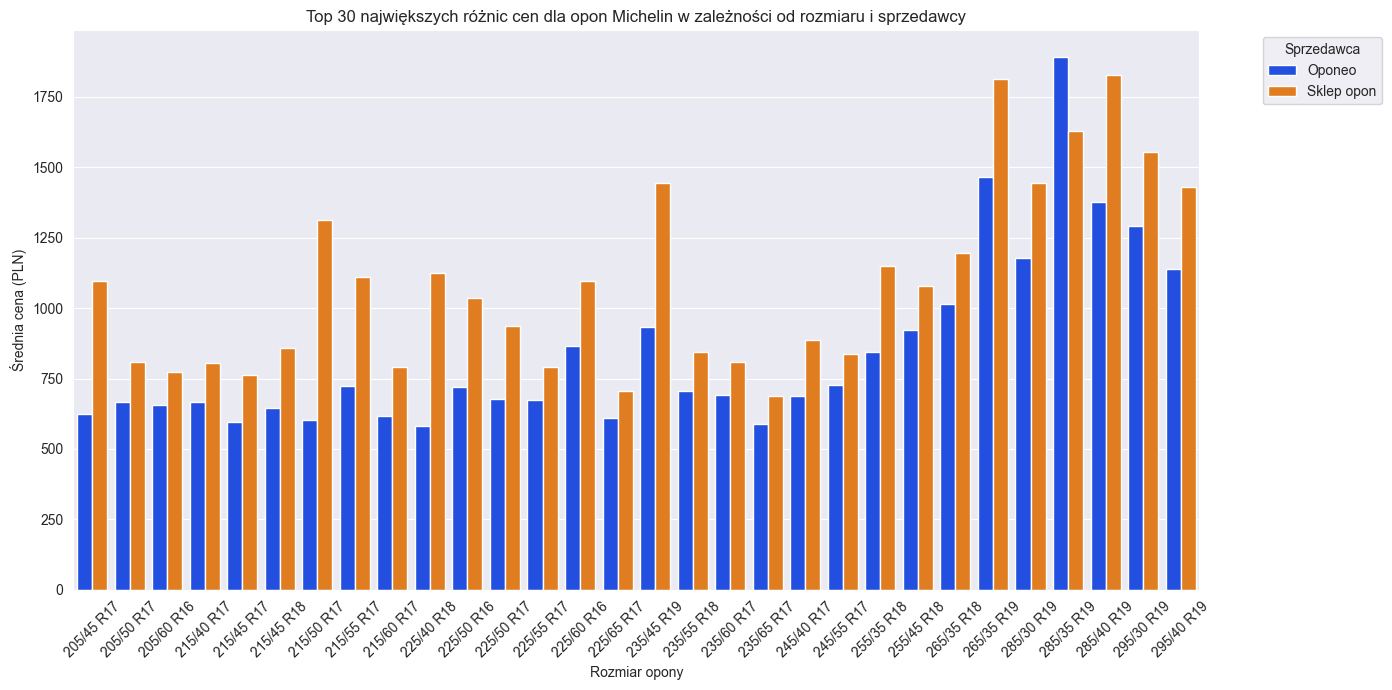

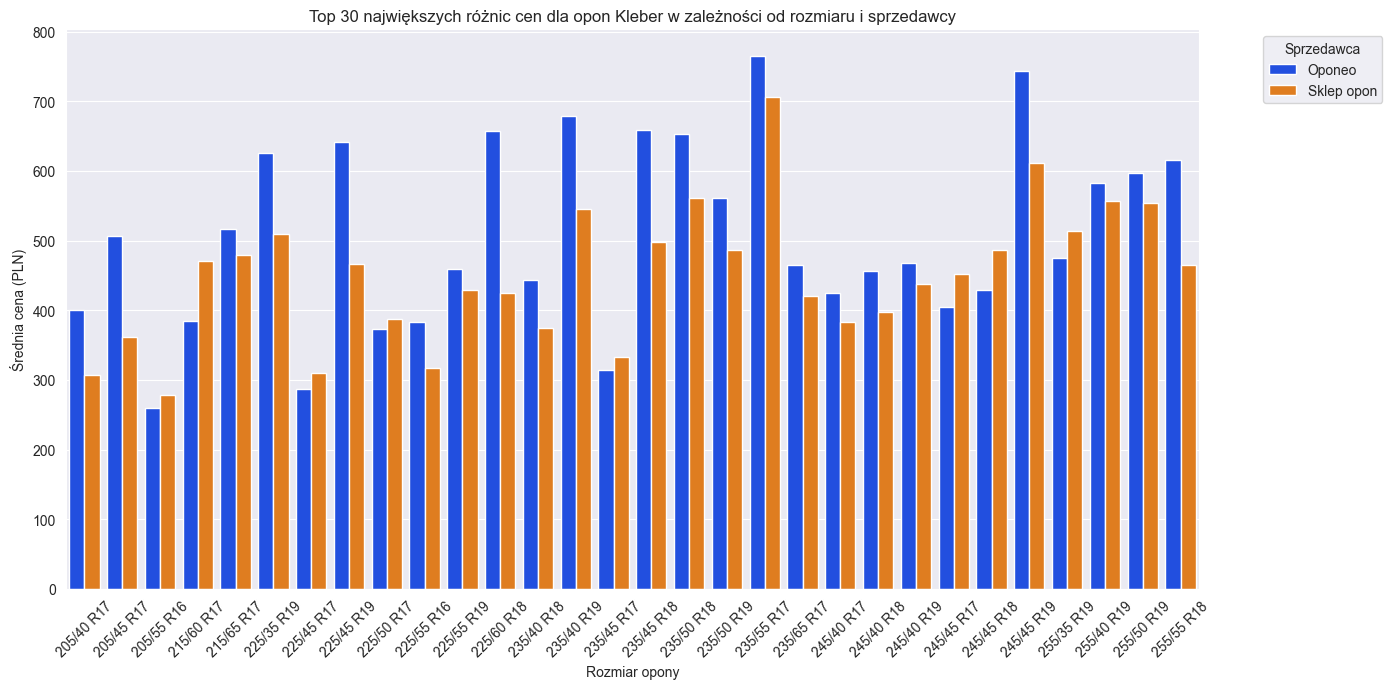

In [26]:
michelin_df = df[df['brand'] == 'Michelin']

avg_price_by_retailer_size = michelin_df.groupby(['retailer', 'size'], observed=True)['price'].mean().reset_index()

price_diff = avg_price_by_retailer_size.groupby('size', observed=True)['price'].agg(['max', 'min']).reset_index()
price_diff['diff'] = price_diff['max'] - price_diff['min']

top_30_diff = price_diff.sort_values(by='diff', ascending=False).head(30)

top_30_sizes = top_30_diff['size'].astype(str).tolist()
filtered_df = avg_price_by_retailer_size.copy()
filtered_df['size'] = filtered_df['size'].astype(str)

filtered_df.loc[:, 'size'] = pd.Categorical(filtered_df['size'], categories=top_30_sizes, ordered=True)

plt.figure(figsize=(14, 7))
sns.barplot(x='size', y='price', hue='retailer', data=filtered_df, palette="bright")
plt.title("Top 30 największych różnic cen dla opon Michelin w zależności od rozmiaru i sprzedawcy")
plt.xlabel("Rozmiar opony")
plt.ylabel("Średnia cena (PLN)")
plt.xticks(rotation=45)
plt.legend(title="Sprzedawca", bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()

kleber_df = df[df['brand'] == 'Dębica']

avg_price_by_retailer_size = kleber_df.groupby(['retailer', 'size'], observed=True)['price'].mean().reset_index()

price_diff = avg_price_by_retailer_size.groupby('size', observed=True)['price'].agg(['max', 'min']).reset_index()
price_diff['diff'] = price_diff['max'] - price_diff['min']

top_30_diff = price_diff.sort_values(by='diff', ascending=False).head(30)

top_30_sizes = top_30_diff['size'].astype(str).tolist()
filtered_df = avg_price_by_retailer_size.copy()
filtered_df['size'] = filtered_df['size'].astype(str)

filtered_df.loc[:, 'size'] = pd.Categorical(filtered_df['size'], categories=top_30_sizes, ordered=True)

plt.figure(figsize=(14, 7))
sns.barplot(x='size', y='price', hue='retailer', data=filtered_df, palette="bright")
plt.title("Top 30 największych różnic cen dla opon Kleber w zależności od rozmiaru i sprzedawcy")
plt.xlabel("Rozmiar opony")
plt.ylabel("Średnia cena (PLN)")
plt.xticks(rotation=45)
plt.legend(title="Sprzedawca", bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()

### 4.2. Średnia cena opon w zależności od rozmiaru i sklepu

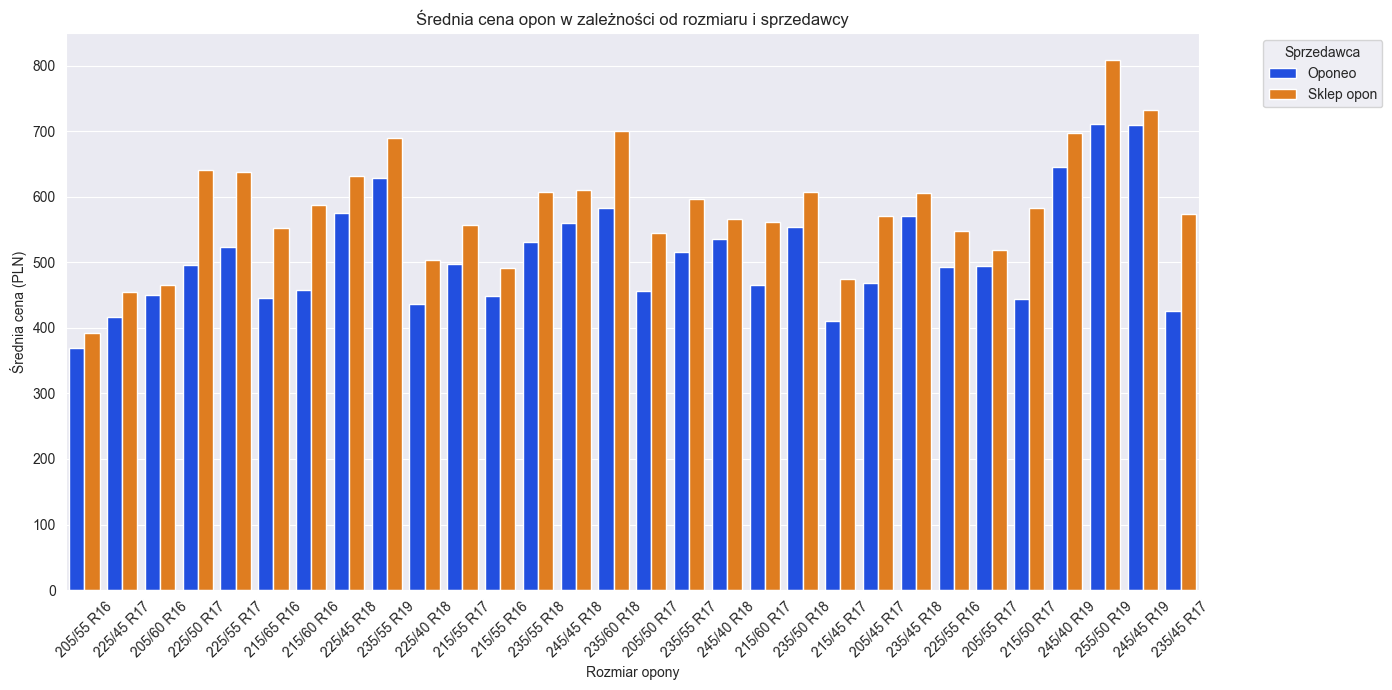

In [27]:
avg_price_by_retailer_size = df.groupby(['retailer', 'size'], observed=True)['price'].mean().reset_index()

top_sizes = (
    df['size']
    .value_counts()  # Liczba wystąpień każdego rozmiaru
    .head(30)  # Top 30 najczęściej występujących rozmiarów
    .index.tolist()
)

# Filtrowanie danych do wybranych rozmiarów
filtered_df = avg_price_by_retailer_size.copy()
filtered_df = filtered_df[filtered_df['size'].isin(top_sizes)]

# Ustawienie kolejności kategorii dla wykresu
filtered_df['size'] = pd.Categorical(filtered_df['size'], categories=top_sizes, ordered=True)

# Tworzenie wykresu
plt.figure(figsize=(14, 7))
sns.barplot(x='size', y='price', hue='retailer', data=filtered_df, palette="bright")

# Ustawienia wykresu
plt.title("Średnia cena opon w zależności od rozmiaru i sprzedawcy")
plt.xlabel("Rozmiar opony")
plt.ylabel("Średnia cena (PLN)")
plt.xticks(rotation=45)
plt.legend(title="Sprzedawca", bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()

# Wyświetlenie wykresu
plt.show()

## 4.3 Średnie ceny opon w zależności od klasy, rozmiaru i sprzedawcy

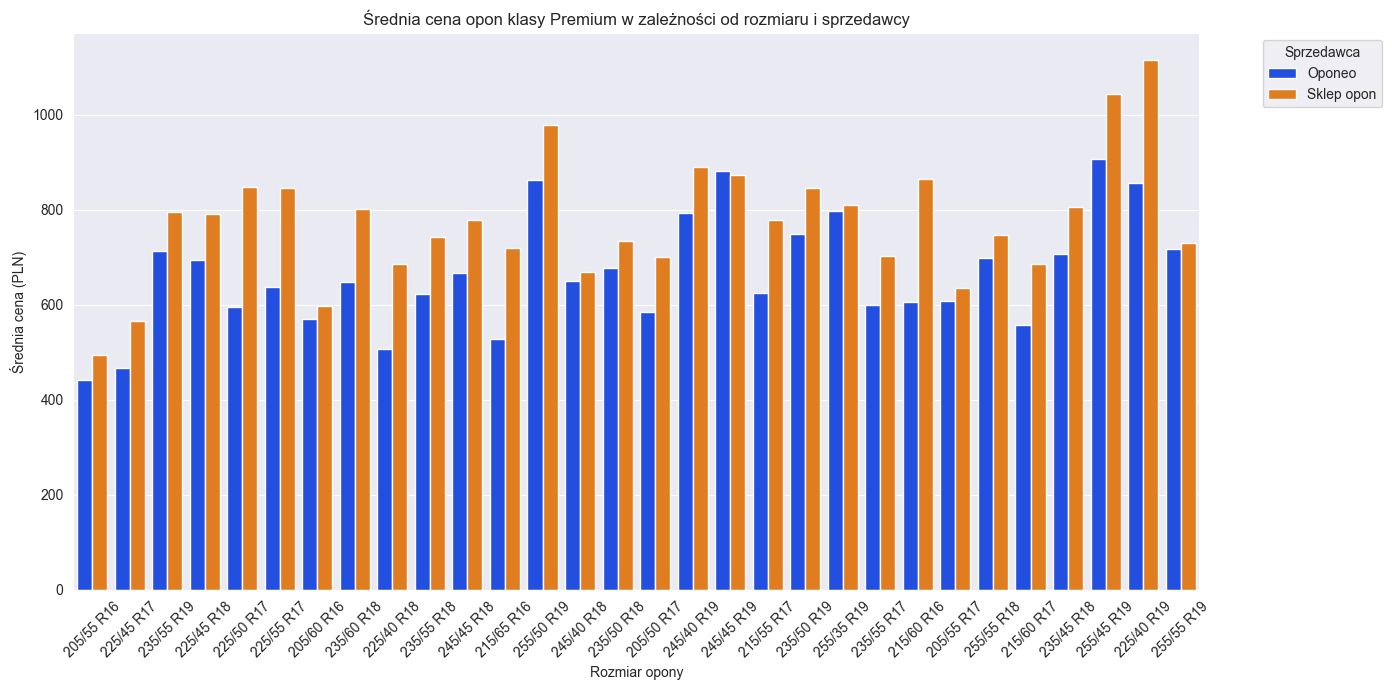

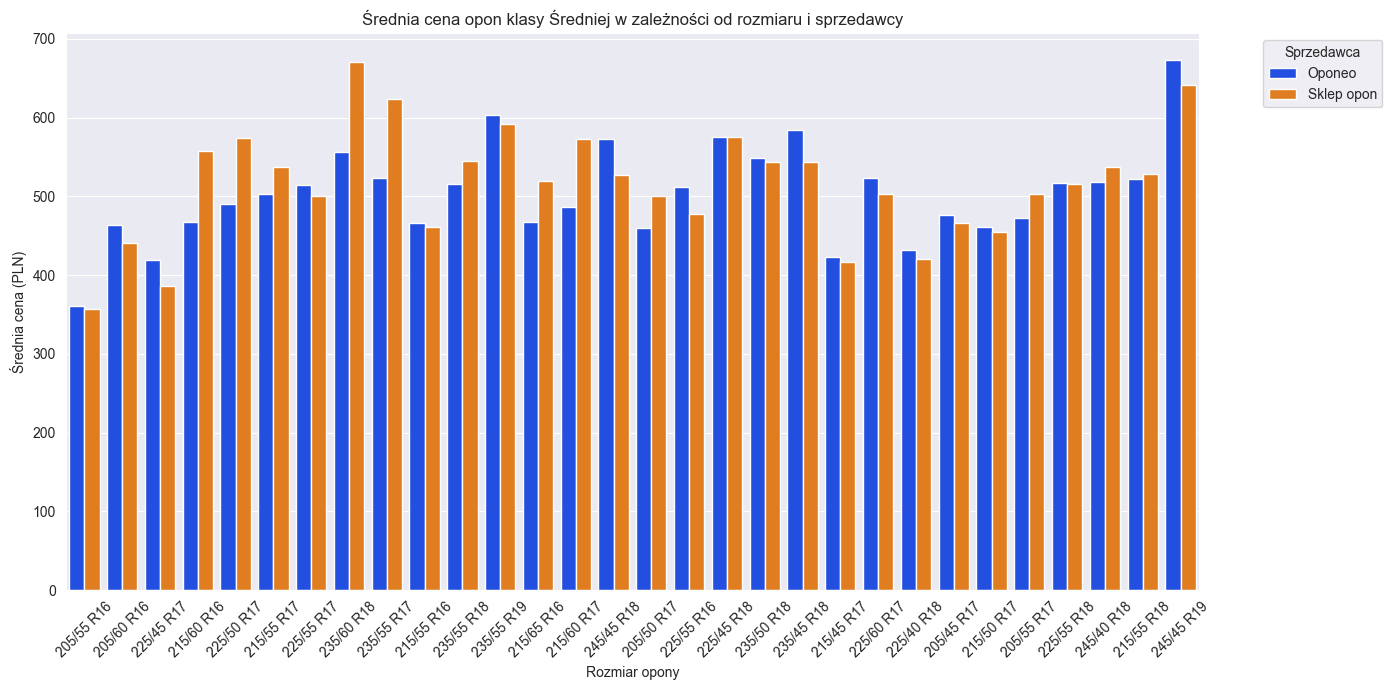

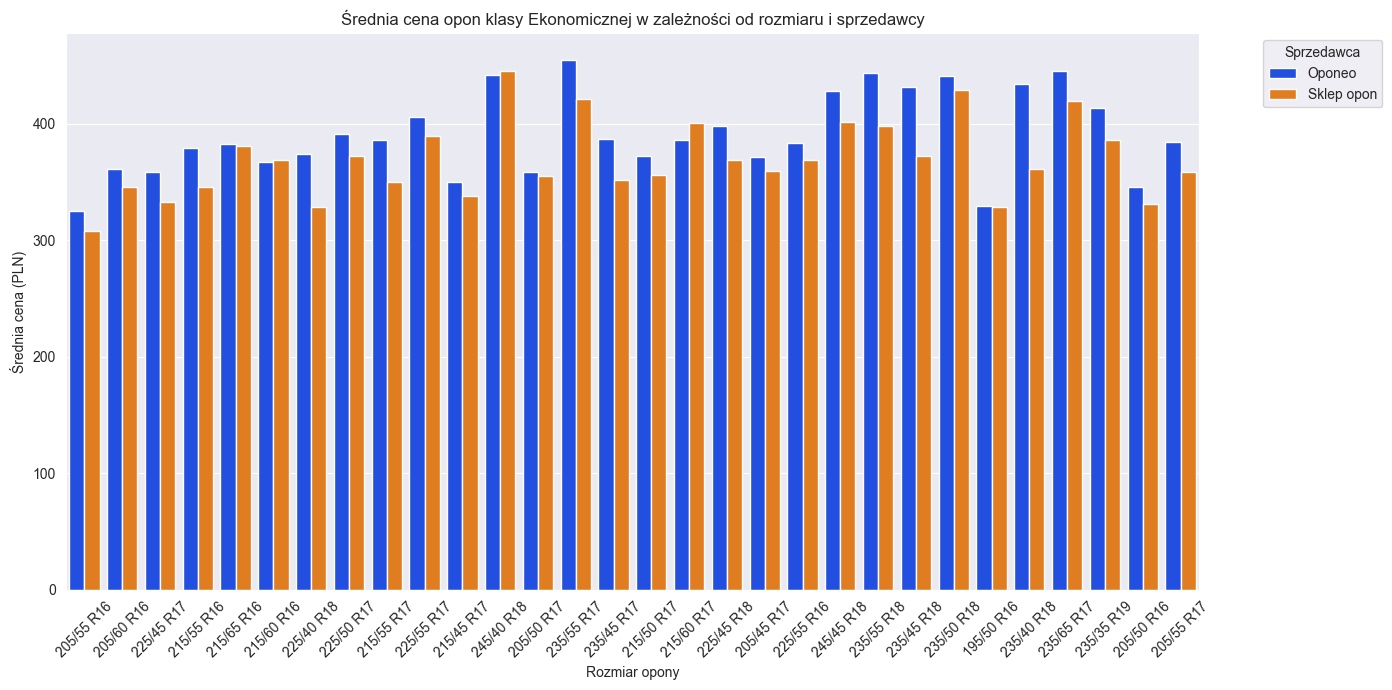

In [28]:
premium_df = df[df['class'] == 'Premium']
mid_range_df = df[df['class'] == 'Średnia']
economic_df = df[df['class'] == 'Ekonomiczna']

# Funkcja pomocnicza do tworzenia wykresu
def plot_avg_price_by_size_and_retailer(data, title):
    # Grupowanie danych: średnia cena opon w zależności od rozmiaru i sklepu
    avg_price_by_retailer_size = data.groupby(['retailer', 'size'], observed=True)['price'].mean().reset_index()

    # Przygotowanie listy rozmiarów do wyświetlenia (np. top 30 najczęściej występujących rozmiarów)
    top_sizes = (
        data['size']
        .value_counts()  # Liczba wystąpień każdego rozmiaru
        .head(30)  # Top 30 najczęściej występujących rozmiarów
        .index.tolist()
    )

    # Filtrowanie danych do wybranych rozmiarów
    filtered_df = avg_price_by_retailer_size.copy()
    filtered_df = filtered_df[filtered_df['size'].isin(top_sizes)]

    # Ustawienie kolejności kategorii dla wykresu
    filtered_df['size'] = pd.Categorical(filtered_df['size'], categories=top_sizes, ordered=True)

    # Tworzenie wykresu
    plt.figure(figsize=(14, 7))
    sns.barplot(x='size', y='price', hue='retailer', data=filtered_df, palette="bright")

    # Ustawienia wykresu
    plt.title(title)
    plt.xlabel("Rozmiar opony")
    plt.ylabel("Średnia cena (PLN)")
    plt.xticks(rotation=45)
    plt.legend(title="Sprzedawca", bbox_to_anchor=(1.05, 1), loc='upper left')
    plt.tight_layout()

    # Wyświetlenie wykresu
    plt.show()

# Tworzenie wykresów dla każdej klasy
plot_avg_price_by_size_and_retailer(premium_df, "Średnia cena opon klasy Premium w zależności od rozmiaru i sprzedawcy")
plot_avg_price_by_size_and_retailer(mid_range_df, "Średnia cena opon klasy Średniej w zależności od rozmiaru i sprzedawcy")
plot_avg_price_by_size_and_retailer(economic_df, "Średnia cena opon klasy Ekonomicznej w zależności od rozmiaru i sprzedawcy")

### 4.4. Średnia cena:
- w zależności od sklepu
- w zależności od sklepu i klasy
- w zależności od marki i sklepu

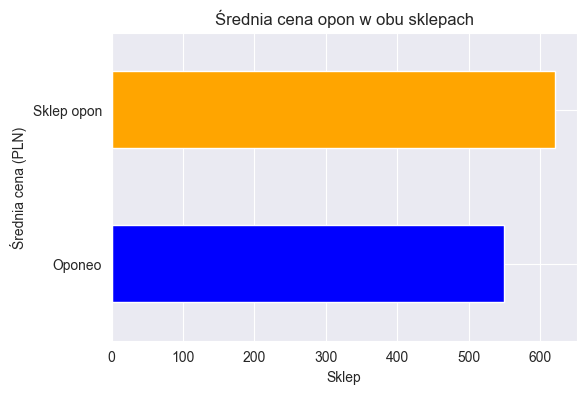

<Figure size 1000x600 with 0 Axes>

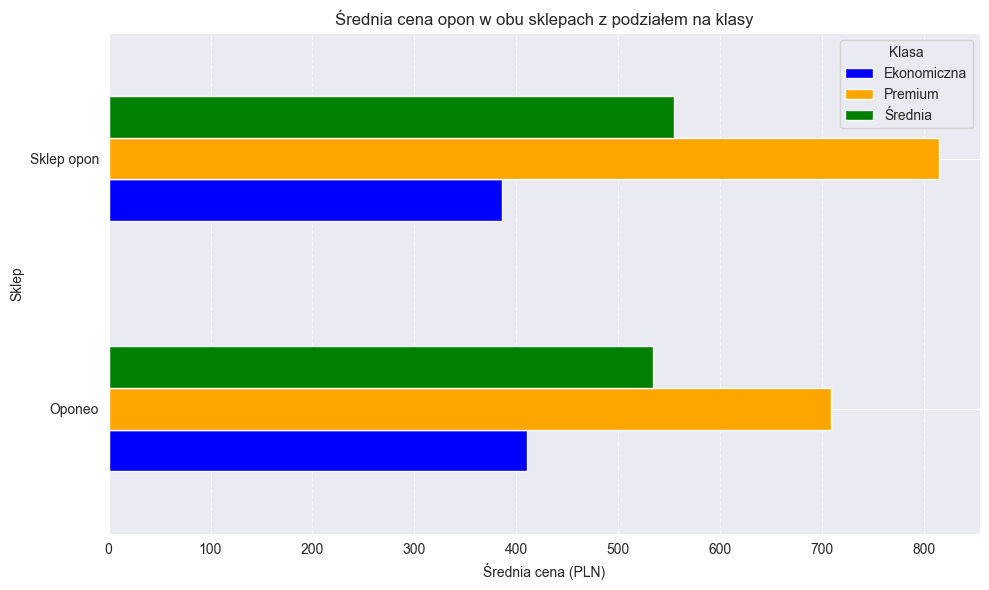

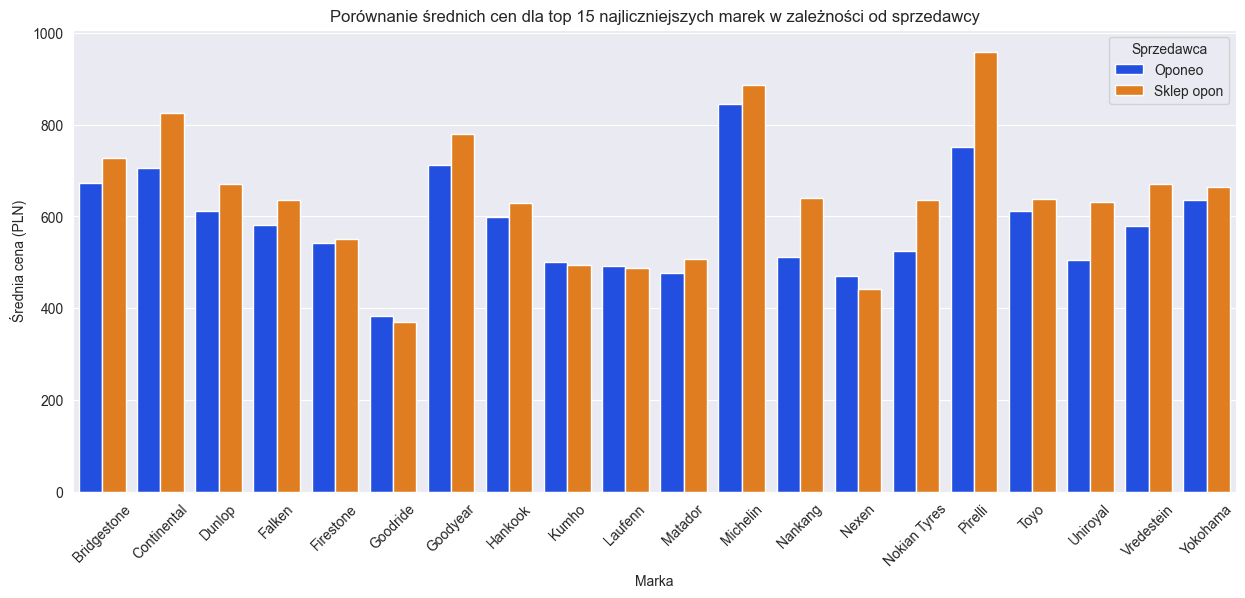

In [12]:
avg_price_by_source = df.groupby('retailer')['price'].mean()
plt.figure(figsize=(6, 4))
avg_price_by_source.plot(kind='barh', color=['blue', 'orange'])
plt.title("Średnia cena opon w obu sklepach")
plt.ylabel("Średnia cena (PLN)")
plt.xlabel("Sklep")
plt.show()

avg_price_by_source_and_class = df.groupby(['retailer', 'class'], observed=False)['price'].mean().unstack()

# Tworzenie wykresu
plt.figure(figsize=(10, 6))
avg_price_by_source_and_class.plot(kind='barh', stacked=False, figsize=(10, 6), color=['blue', 'orange', 'green'])  # Kolory dla klas
plt.title("Średnia cena opon w obu sklepach z podziałem na klasy")
plt.xlabel("Średnia cena (PLN)")
plt.ylabel("Sklep")
plt.legend(title="Klasa", loc='best')  # Legenda dla klas
plt.grid(axis='x', linestyle='--', alpha=0.7)

plt.tight_layout()
plt.show()

top_15_brands = df['brand'].value_counts().nlargest(15).index
df_top_brands = df[df['brand'].isin(top_15_brands)]
avg_price_by_brand_retailer = df_top_brands.groupby(['brand', 'retailer'])['price'].mean().reset_index()
plt.figure(figsize=(15, 6))
sns.barplot(x='brand', y='price', hue='retailer', data=avg_price_by_brand_retailer, palette="bright")
plt.title("Porównanie średnich cen dla top 15 najliczniejszych marek w zależności od sprzedawcy")
plt.xlabel("Marka")
plt.ylabel("Średnia cena (PLN)")
plt.xticks(rotation=45)
plt.legend(title="Sprzedawca")
plt.show()

### 4.5. Rozkład:
- indeksu efektywności paliwowej w zależności od sklepu
- indeksu przyczepności na mokrej nawierzchni w zależności od sklepu
- poziomu hałasu w zależności od sklepu
- klas opon w zależności od sklepu

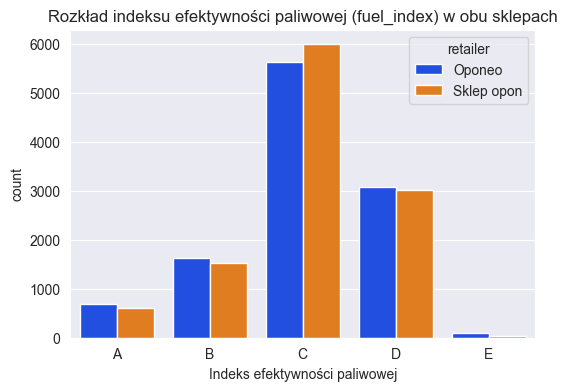

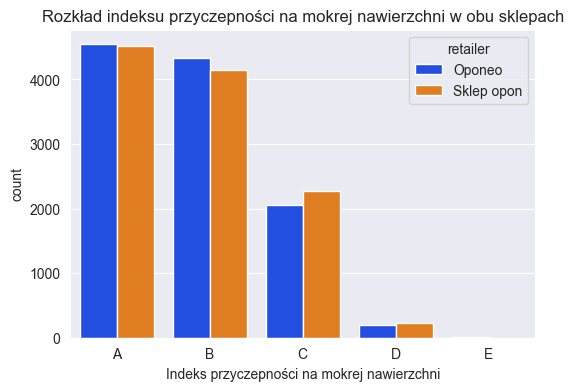

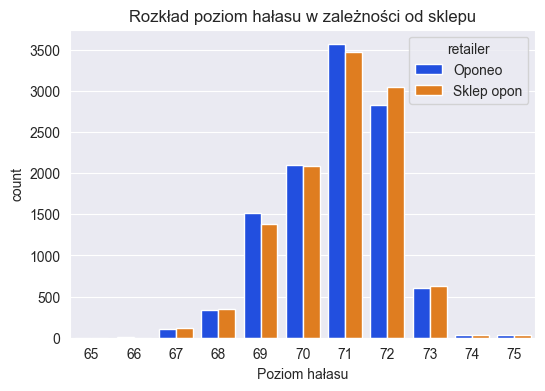

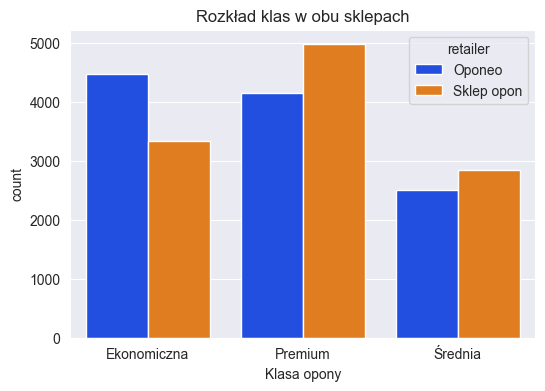

In [11]:
plt.figure(figsize=(6, 4))
sns.countplot(x='fuel_index', hue='retailer', data=df, palette='bright')
plt.title("Rozkład indeksu efektywności paliwowej (fuel_index) w obu sklepach")
plt.xlabel("Indeks efektywności paliwowej")
plt.show()

plt.figure(figsize=(6, 4))
sns.countplot(x='wet_grip_index', hue='retailer', data=df, palette='bright')
plt.title("Rozkład indeksu przyczepności na mokrej nawierzchni w obu sklepach")
plt.xlabel("Indeks przyczepności na mokrej nawierzchni")
plt.show()

plt.figure(figsize=(6, 4))
sns.countplot(x='noise_level', hue='retailer', data=df, palette='bright')
plt.title("Rozkład poziom hałasu w zależności od sklepu")
plt.xlabel("Poziom hałasu")
plt.show()

plt.figure(figsize=(6, 4))
sns.countplot(x='class', hue='retailer', data=df, palette='bright')
plt.title("Rozkład klas w obu sklepach")
plt.xlabel("Klasa opony")
plt.show()


### 4.6. Korelacja parametrów
- cena
- klasa
- ocena użytkownika
- poziom hałasu
- indeks efektywności paliwowej
- indeks przyczepności na mokrej nawierzchni

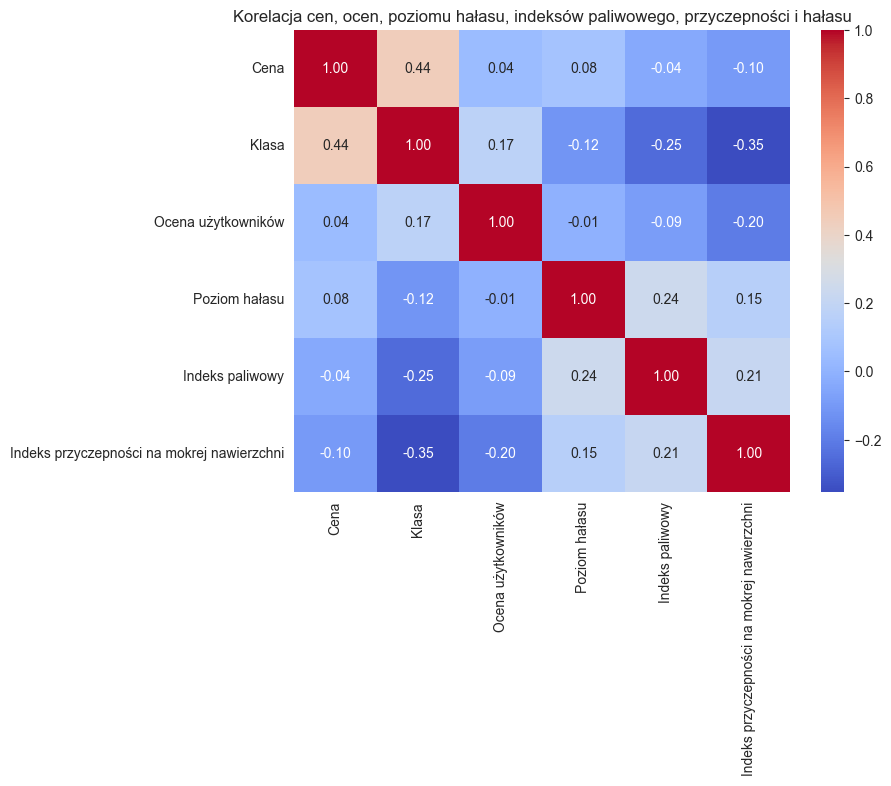

In [12]:
def class_to_int(cls):
    return {'Premium': 3, 'Średnia': 2, 'Ekonomiczna': 1}.get(cls, 0)

def letter_to_int(letter):
    return ord(letter.upper()) - ord('A') + 1

df['fuel_index_int'] = df['fuel_index'].apply(letter_to_int)
df['wet_grip_index_int'] = df['wet_grip_index'].apply(letter_to_int)
df['class_int'] = df['class'].apply(class_to_int)

df_heat_columns = df.rename(columns={
    'price': 'Cena',
    'class_int': 'Klasa',
    'user_rating': 'Ocena użytkowników',
    'noise_level': 'Poziom hałasu',
    'fuel_index_int': 'Indeks paliwowy',
    'wet_grip_index_int': 'Indeks przyczepności na mokrej nawierzchni'
})
correlation = df_heat_columns[['Cena', 'Klasa', 'Ocena użytkowników', 'Poziom hałasu', 
                          'Indeks paliwowy', 'Indeks przyczepności na mokrej nawierzchni']].corr()
plt.figure(figsize=(8, 6))
sns.heatmap(correlation, annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Korelacja cen, ocen, poziomu hałasu, indeksów paliwowego, przyczepności i hałasu")
plt.show()

## 4.7. Wnioski z heatmap'y
- Najsilniejszą korelację widać pomiędzy ceną a klasą opony
- Umiarkowaną korelację widać pomiędzy klasą opony a oceną użytkowników
- Korelację możemy również zaobserwować między indeksem paliwowym a poziomem hałasu
- Inne indeksy również są ze sobą skorelowane: indeks paliwowy - indeks przyczepności na mokrej nawierzchni oraz poziom hałasu - indeks przyczepności na mokrej nawierzchni

### 4.8. 15 najliczniejszych marek opon w zbiorze danych

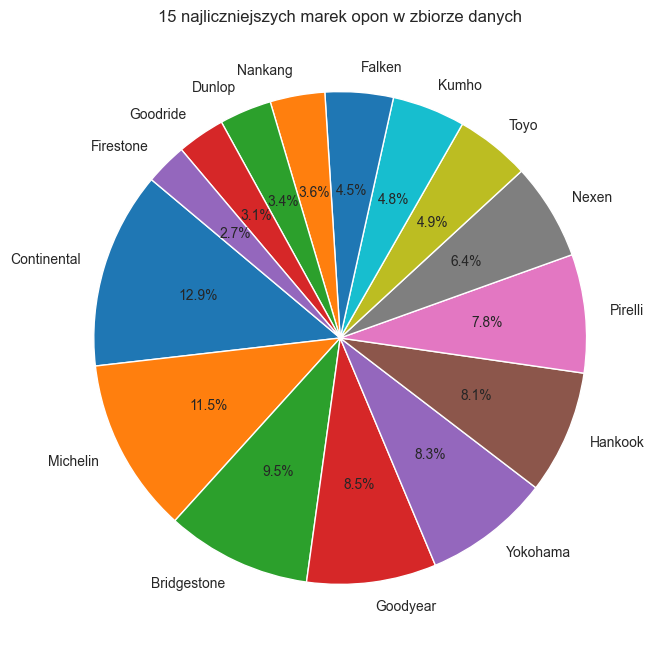

In [13]:
top_15_brands = df['brand'].value_counts().nlargest(15)

plt.figure(figsize=(8, 8))
colors = plt.cm.tab10.colors  # Paleta 10 różnych kolorów
plt.pie(top_15_brands, labels=top_15_brands.index, autopct='%1.1f%%', startangle=140, colors=colors)
plt.title('15 najliczniejszych marek opon w zbiorze danych')
plt.show()


# 5. Porównanie i wnioski

## Kluczowe różnice między sklepami

### Cena:
- **Klasa ekonomiczna:** Oponeo oferuje szerszy wybór opon w tej klasie, jednak opony w Sklepie Opon są tańsze w tej kategorii.
- **Klasa średnia i premium:** Sklep Opon jest droższy niż Oponeo w obu tych kategoriach, jednak ma mniejszy wybór.

### Cechy opon:
- **Sklep Opon:** Posiada większy udział opon klasy średniej i premium w swojej ofercie, co wskazuje na bardziej luksusowy asortyment.
- **Oponeo:** Charakteryzuje się bardziej zrównoważonym rozkładem oferty między klasami premium, średnią i ekonomiczną.

### Różnorodność oferty:
- **Oponeo:** Dysponuje szerszym wyborem opon w klasie ekonomicznej, co mylnie czyni go bardziej przyjaznym dla klientów z ograniczonym budżetem.
- **Sklep Opon:** Wyróżnia się większym wyborem marek i modeli opon średniej i wysokiej klasy.

### Oceny użytkowników:
- Sklep Opon cieszy się wyższymi ocenami użytkowników niż Oponeo. Sugeruje to, że klienci są bardziej zadowoleni z zakupów w Sklepie Opon, być może ze względu na jakość obsługi lub asortyment.

## Wnioski i rekomendacje:
- **Klasa ekonomiczna:**
  - Jeśli priorytetem jest niższa cena w klasie ekonomicznej, warto rozważyć zakupy w Sklepie Opon.
  - Jeżeli kluczowa jest niska cena w klasie średniej i premium, warto sprawdzić ofertę w Oponeo.
  - Jeśli klient szuka większego wyboru opon budżetowych, Oponeo jest lepszym wyborem.
- **Klasa średnia i premium:** Oponeo oferuje bardziej konkurencyjne ceny w tych segmentach, co czyni go bardziej atrakcyjnym dla klientów szukających opon w wyższych kategoriach.
- **Oceny i obsługa:** Sklep Opon wyróżnia się wyższą jakością obsługi klienta i lepszymi ocenami.
- **Ogólna rekomendacja:**
  - Dla klientów poszukujących **tańszych opon budżetowych** – **Sklep Opon**.
  - Dla klientów ceniących **lepszą obsługę klienta** – **Sklep Opon**.
  - W innych przypadkach – **Oponeo**, dzięki bardziej zróżnicowanej ofercie i konkurencyjnym cenom w klasie średniej i premium.


# 6. Uczenie modeli Random Forest Regressor
## Uzasadnienie wyboru modelu: Random Forest Regressor

### Dlaczego Random Forest?
Random Forest Regressor został wybrany do tego zadania ze względu na następujące zalety:
1. **Wszechstronność**: Random Forest działa efektywnie zarówno z danymi numerycznymi, jak i kategorycznymi, co jest istotne w przypadku mojego zbioru danych, który zawiera cechy takie jak cena, oceny użytkowników (numeryczne) oraz indeksy i klasy (kategoryczne).
2. **Obsługa brakujących danych i nieliniowości**: Random Forest radzi sobie dobrze z brakującymi wartościami (po uprzednim oczyszczeniu danych) oraz nieliniowymi zależnościami między cechami.
3. **Stabilność wyników**: Wysoka odporność na zmienność danych treningowych dzięki agregacji wyników z wielu drzew.

### Dlaczego nie inne modele?
Random Forest oferuje równowagę między prostotą, skutecznością i interpretowalnością wyników. W moim przypadku:
- Jest mniej skomplikowany do skonfigurowania niż XGBoost.
- Nie wymaga specyficznej normalizacji danych, jak w przypadku KNN czy SVM.
- Potrafi skutecznie radzić sobie z danymi o mieszanym typie (numeryczne i kategoryczne), co byłoby trudniejsze dla regresji liniowej lub SVM.

### Kluczowe elementy procesu:
1. **OneHotEncoder**: Przekształcenie danych kategorycznych (np. `class`, `size`) w formę liczbową wymaganą przez model.
2. **Standaryzacja danych numerycznych**: `MinMaxScaler` przekształca cechy takie jak `price` i `user_rating` na wspólną skalę `[0, 1]`, co minimalizuje wpływ różnic w wartościach cech.
3. **Pipeline**: Umożliwia jednoczesne przetwarzanie danych i trenowanie modelu, co upraszcza proces i zmniejsza ryzyko błędów.
4. **Ustalona metryka celu (`score`)**: Uwzględnienie wag dla cech takich jak oceny użytkownika, cena i parametry techniczne opon (indeksy) w ocenie modeli.

### Wady Random Forest:
- **Wysokie wymagania obliczeniowe**: Tworzenie wielu drzew decyzyjnych wymaga znacznych zasobów, co może być wyzwaniem przy bardzo dużych zbiorach danych.
- **Mniej intuicyjna interpretacja**: Trudniej zrozumieć, w jaki sposób poszczególne cechy wpływają na predykcję, w porównaniu do prostszych modeli, takich jak regresja liniowa.

## 6.1 Model uczenia maszynowego do sugerowania opon na podstawie wprowadzanych parametrów


In [5]:
data_suggestions = df
data_suggestions.dropna(inplace=True)

def convert_to_numeric(column, categories):
    mapping = {value: idx for idx, value in enumerate(categories)}
    return column.map(mapping).astype(int)

# Przekształcenie wartości literowych w indeksach na wartości numeryczne
data_suggestions['speed_index_numeric'] = convert_to_numeric(data_suggestions['speed_index'], ['N', 'Q', 'R', 'S', 'T', 'H', 'V', 'W', 'Y'])
data_suggestions['fuel_index_numeric'] = convert_to_numeric(data_suggestions['fuel_index'], ['E', 'D', 'C', 'B', 'A'])
data_suggestions['wet_grip_index_numeric'] = convert_to_numeric(data_suggestions['wet_grip_index'], ['E', 'D', 'C', 'B', 'A'])
data_suggestions['noise_index_numeric'] = convert_to_numeric(data_suggestions['noise_index'], ['C', 'B', 'A'])

w_user_rating = 0.5
w_price = 0.3
w_index = 0.2

data_suggestions['score'] = (
    w_user_rating * data_suggestions['user_rating'] -  # Wyższa ocena użytkownika → wyższy score
    w_price * (data_suggestions['price'] / data_suggestions['price'].max()) +  # Niższa cena → wyższy score (przeskalowana)
    w_index * (
        data_suggestions['speed_index_numeric'] +
        data_suggestions['fuel_index_numeric'] +
        data_suggestions['wet_grip_index_numeric'] +
        data_suggestions['noise_index_numeric']
    )
)

X = data_suggestions[['price', 'user_rating', 'noise_index_numeric', 'wet_grip_index_numeric', 'fuel_index_numeric', 'speed_index_numeric']]
y = data_suggestions['score']

# Podział danych na zestawy treningowe i testowe
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standaryzacja cech wejściowych
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Trening modelu regresyjnego
model = RandomForestRegressor(n_estimators=100, random_state=42)
model.fit(X_train_scaled, y_train)

RandomForestRegressor(random_state=42)

## 6.1 Model uczenia maszynowego do predykcji ceny opony na podstawie jej parametrów
- tutaj również został wykorzystany random forest

In [6]:
data_predictions = df
data_predictions.dropna()

data_predictions = data_predictions.dropna()

X = data_predictions[['brand', 'retailer', 'size', 'class', 'load_index',
          'fuel_index', 'wet_grip_index', 'noise_index']]
y = data_predictions['price']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

categorical_features = ['brand', 'retailer', 'size', 'class', 'load_index',
                        'fuel_index', 'wet_grip_index', 'noise_index']
categorical_transformer = OneHotEncoder(handle_unknown='ignore')

preprocessor = ColumnTransformer(
    transformers=[
        ('cat', categorical_transformer, categorical_features)
    ],
    remainder='passthrough'
)

price_model = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('regressor', RandomForestRegressor(n_estimators=100, random_state=42))
])

price_model.fit(X_train, y_train)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('cat',
                                                  OneHotEncoder(handle_unknown='ignore'),
                                                  ['brand', 'retailer', 'size',
                                                   'class', 'load_index',
                                                   'fuel_index',
                                                   'wet_grip_index',
                                                   'noise_index'])])),
                ('regressor', RandomForestRegressor(random_state=42))])

## 6.2 Zapis modeli i danych do plików wykorzystywanych w aplikacjach streamlit

In [31]:
with open('data/models/tyres_model.pkl', 'wb') as f:
    pickle.dump(model, f)

with open('data/models/tyres_scaler.pkl', 'wb') as f:
    pickle.dump(scaler, f)

print("Model i skaler zostały zapisane do plików 'tyres_model.pkl' i 'tyres_scaler.pkl'")

with open('data/models/price_prediction_model.pkl', 'wb') as f:
    pickle.dump(price_model, f)

print("Model został wytrenowany i zapisany jako 'price_prediction_model.pkl'")

print("Modele zostały zapisany w folderze data/models")

data_suggestions.to_csv("data/models/tyres_data.csv", index=False)
print("Dane testowe zostały zapisane w folderze data/models jako tyres_data.csv")

Model i skaler zostały zapisane do plików 'tyres_model.pkl' i 'tyres_scaler.pkl'
Model został wytrenowany i zapisany jako 'price_prediction_model.pkl'
Modele zostały zapisany w folderze data/models
Dane testowe zostały zapisane w folderze data/models jako tyres_data.csv


In [8]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# Predykcja na zbiorze testowym
y_pred_recommendations = model.predict(X_test_scaled)

# Obliczenie metryk
mae = mean_absolute_error(y_test, y_pred_recommendations)
mse = mean_squared_error(y_test, y_pred_recommendations)
rmse = mse ** 0.5
r2 = r2_score(y_test, y_pred_recommendations)

# Wyświetlenie wyników
print("Model rekomendacji:")
print(f"MAE: {mae:.4f}")
print(f"MSE: {mse:.4f}")
print(f"RMSE: {rmse:.4f}")
print(f"R²: {r2:.4f}")


# Predykcja na zbiorze testowym
y_pred_price = price_model.predict(X_test)

# Obliczenie metryk
mae_price = mean_absolute_error(y_test, y_pred_price)
mse_price = mean_squared_error(y_test, y_pred_price)
rmse_price = mse_price ** 0.5
r2_price = r2_score(y_test, y_pred_price)

# Wyświetlenie wyników
print("Model przewidywania ceny:")
print(f"MAE: {mae_price:.4f}")
print(f"MSE: {mse_price:.4f}")
print(f"RMSE: {rmse_price:.4f}")
print(f"R²: {r2_price:.4f}")


Model rekomendacji:
MAE: 573.0266
MSE: 455253.5968
RMSE: 674.7248
R²: -2.5859
Model przewidywania ceny:
MAE: 115.2946
MSE: 100334.8310
RMSE: 316.7567
R²: 0.2097
